In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import seaborn as sns
%matplotlib inline

In [2]:
d=pd.read_csv('https://grantmlong.com/data/streeteasy_rents_june2016.csv')

In [3]:
d.head()

,rental_id,building_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,submarket,borough
0,1545,44518357,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,All Upper East Side,Manhattan
1,2472,94441623,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,All Downtown,Manhattan
2,10234,87632265,3000,3.0,1,1000,4,1.0,106,0,0,0,0,0,0,0,0,Astoria,Northwest Queens,Queens
3,2919,76909719,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,All Midtown,Manhattan
4,2790,92953520,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,All Downtown,Manhattan


array([[<AxesSubplot:title={'center':'rent'}>]], dtype=object)

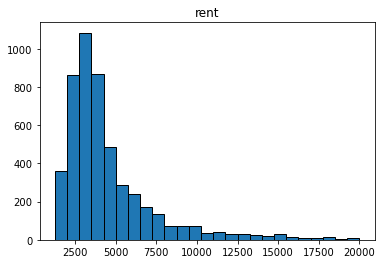

In [4]:
d.hist(['rent'],edgecolor='black',bins=25,grid=False)

In [5]:
d.describe()

,rental_id,building_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym
count,5000.000000,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,5526.909400,5.122007e+07,4536.920800,1.395700,1.321600,920.101400,5.079200,10.190200,52.093200,0.429600,0.12860,0.133800,0.228000,0.240000,0.155600,0.045600,0.143800
std,3263.692417,2.802283e+07,2929.838953,0.961018,0.565542,440.150464,5.268897,10.565361,40.224501,0.495069,0.33479,0.340471,0.419585,0.427126,0.362512,0.208637,0.350922
min,1.000000,7.107000e+03,1250.000000,0.000000,0.000000,250.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2699.750000,2.699811e+07,2750.000000,1.000000,1.000000,633.000000,2.000000,3.000000,12.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5456.500000,5.069894e+07,3600.000000,1.000000,1.000000,800.000000,4.000000,6.000000,44.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8306.000000,7.572064e+07,5200.000000,2.000000,2.000000,1094.000000,6.000000,14.000000,89.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11349.000000,9.998721e+07,20000.000000,5.000000,5.000000,4800.000000,51.000000,83.000000,180.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
def correlation(d,threshold):
    ds=set()
    fd=d.corr()
    for i in range(len(fd.columns)):
        for j in range(i):
            if abs(fd.iloc[i,j])>threshold:
                v=fd.columns[i]
                ds.add(v)
    return ds    

In [7]:
w=correlation(d,0.6)
len(set(w))

4

In [8]:
w

{'bathrooms', 'has_elevator', 'has_gym', 'size_sqft'}

<AxesSubplot:xlabel='size_sqft', ylabel='rent'>

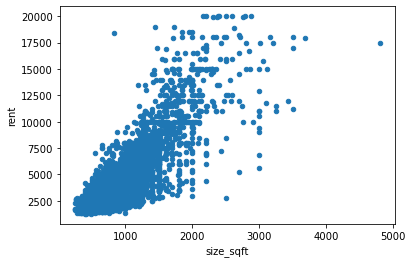

In [9]:
d.plot.scatter('size_sqft','rent')

<AxesSubplot:xlabel='floor', ylabel='rent'>

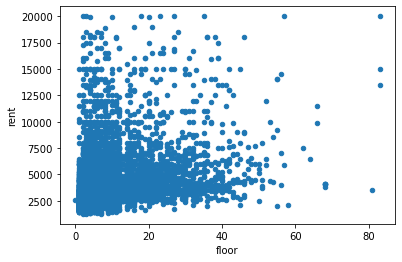

In [10]:
d.plot.scatter('floor','rent')

<AxesSubplot:xlabel='bathrooms', ylabel='rent'>

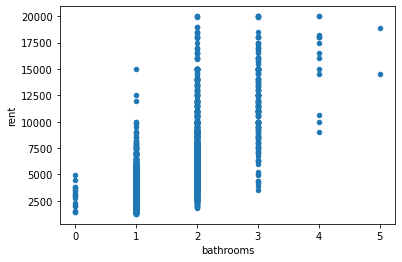

In [11]:
d.plot.scatter('bathrooms','rent')

In [12]:
d.corr()['rent']['bathrooms']

0.7336443859580932

In [13]:
d.corr()['rent']['floor']

0.2723511096190384

In [14]:
d.corr()['rent']['size_sqft']

0.8087835060658329

In [15]:
print('size_sqft has a positive linear relation.')

size_sqft has a positive linear relation.


In [16]:
slope,intercept=np.polyfit(d.size_sqft,d.rent,1)
print('slope:%02f.,intercept:%0.2f.'%(slope,intercept))

slope:5.383626.,intercept:-416.56.


In [17]:
print('Based on this analysis a 700 square feet apartment would rent for $%0.2f ')
(slope*700+intercept)

Based on this analysis a 700 square feet apartment would rent for $%0.2f 


3351.9772104359918

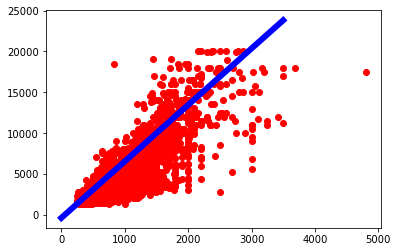

In [18]:
plt.plot(d.size_sqft,d.rent,color='red',marker='.',markersize=12,linestyle='none')
plt.plot([0,3500],[intercept,slope*4500+intercept],color='blue',linewidth=6)

In [19]:
print('When the size_sqrt increases the rent increases .this line  is a goodfit. ')
d['Rent_predicted']=slope*d['rent']+intercept
d['rent_residual']=d['Rent_predicted']-d['rent']
d[['Rent_predicted','rent']]

When the size_sqrt increases the rent increases .this line  is a goodfit. 


,Rent_predicted,rent
0,13311.685057,2550
1,61495.136533,11500
2,15734.316696,3000
3,23809.755491,4500
4,25397.925120,4795
...,...,...
4995,13850.047644,2650
4996,35519.141743,6675
4997,8730.219448,1699
4998,18291.538981,3475


(array([ 360.,  910., 1041.,  869.,  484.,  289.,  242.,  170.,  137.,
          74.,   71.,   70.,   37.,   40.,   49.,   13.,   25.,   22.,
          32.,   14.,   11.,    9.,   14.,    6.,   11.]),
 array([  6312.97143519,  10350.69083258,  14388.41022997,  18426.12962736,
         22463.84902476,  26501.56842215,  30539.28781954,  34577.00721693,
         38614.72661432,  42652.44601171,  46690.1654091 ,  50727.8848065 ,
         54765.60420389,  58803.32360128,  62841.04299867,  66878.76239606,
         70916.48179345,  74954.20119084,  78991.92058824,  83029.63998563,
         87067.35938302,  91105.07878041,  95142.7981778 ,  99180.51757519,
        103218.23697258, 107255.95636998]),
 <BarContainer object of 25 artists>)

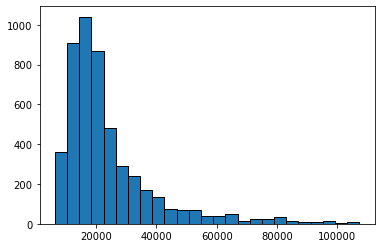

In [20]:
plt.hist(d['Rent_predicted'],bins=25,edgecolor='black')

In [21]:
lm=LinearRegression()
d.columns

Index(['rental_id', 'building_id', 'rent', 'bedrooms', 'bathrooms',
       'size_sqft', 'min_to_subway', 'floor', 'building_age_yrs', 'no_fee',
       'has_roofdeck', 'has_washer_dryer', 'has_doorman', 'has_elevator',
       'has_dishwasher', 'has_patio', 'has_gym', 'neighborhood', 'submarket',
       'borough', 'Rent_predicted', 'rent_residual'],
      dtype='object')

In [26]:
av=['bedrooms','bathrooms','min_to_subway','floor','building_age_yrs','no_fee','has_roofdeck','has_washer_dryer','has_elevator','has_doorman','has_elevator',
       'has_dishwasher', 'has_patio', 'has_gym']

In [27]:
X=d[av]

In [28]:
lm.fit(X,d.rent)

LinearRegression()

In [29]:
print("intercept=",lm.intercept_)
print("No of coefficients=",len(lm.coef_))

intercept= -515.5040360812654
No of coefficients= 14


In [30]:
pd.DataFrame(lm.coef_,index=av,columns=['Estimated coefficients'])

,Estimated coefficients
bedrooms,417.730687
bathrooms,3171.816130
min_to_subway,-22.630204
floor,49.132507
building_age_yrs,-1.488370
no_fee,-344.120712
has_roofdeck,-4.475219
has_washer_dryer,191.475476
has_elevator,200.398650
has_doorman,-41.004582


In [31]:
d['Predicted_value']=lm.predict(X)

In [32]:
d[['rent','Predicted_value']]

,rent,Predicted_value
0,2550,2629.064883
1,11500,6479.317777
2,3000,3710.348635
3,4500,5994.052572
4,4795,3764.126005
...,...,...
4995,2650,2718.315156
4996,6675,7282.301113
4997,1699,2713.830709
4998,3475,3421.494926


Text(0, 0.5, 'frequency')

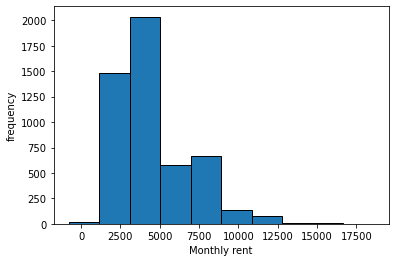

In [33]:
plt.hist(d['Predicted_value'],edgecolor='black')
plt.xlabel('Monthly rent')
plt.ylabel('frequency')


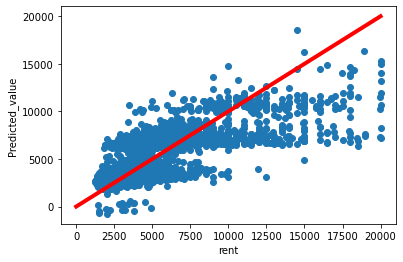

In [34]:
plt.scatter(d['rent'],d['Predicted_value'])
plt.xlabel("rent")
plt.ylabel("Predicted_value")
plt.plot([0,20000],[0,20000],linewidth=4,color='red')


 RESIDUAL SUM OF SQUARES

In [35]:
print('%0.2f'% np.sum((d['rent']-lm.predict(X))**2))

17730479762.04
